<a href="https://colab.research.google.com/github/AmreenShaheen/DIGIBHEM/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

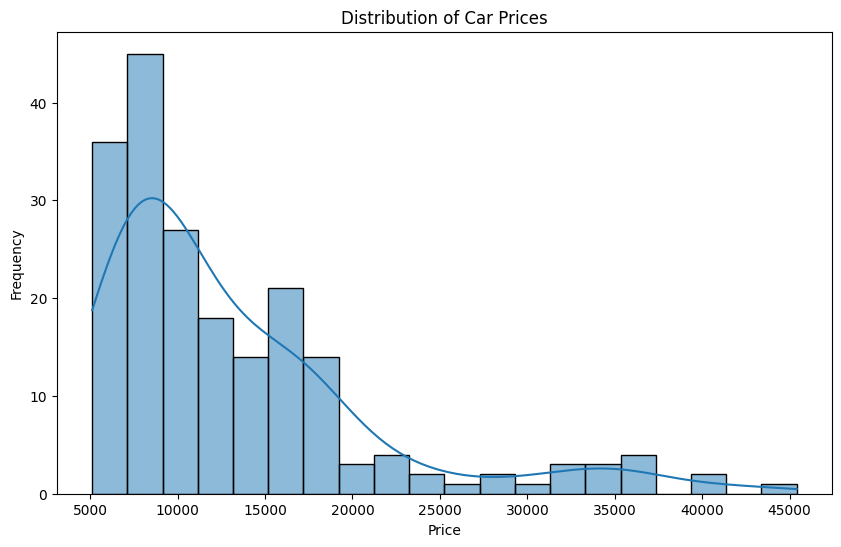

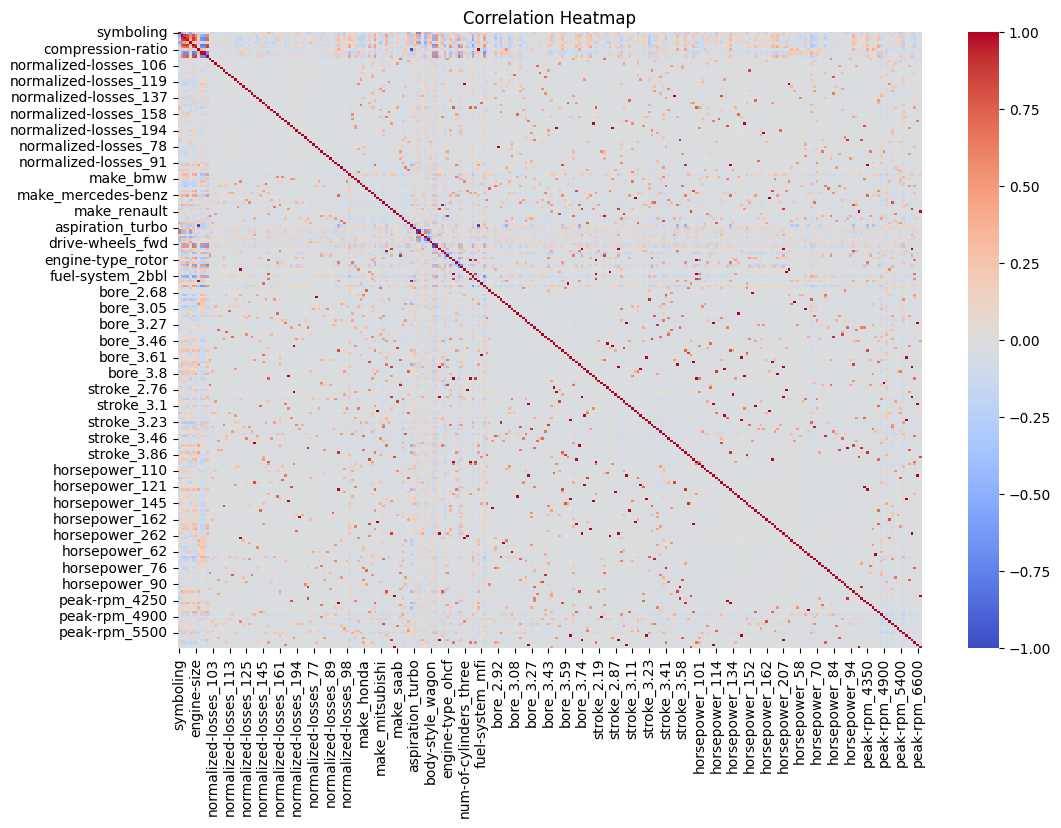

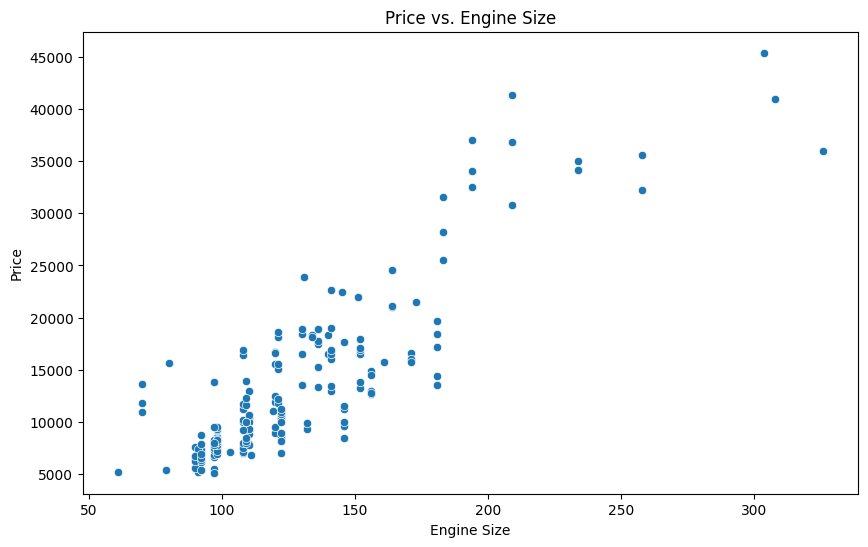

Root Mean Squared Error: 2916.217360053442
R-Squared: 0.9304900041349733


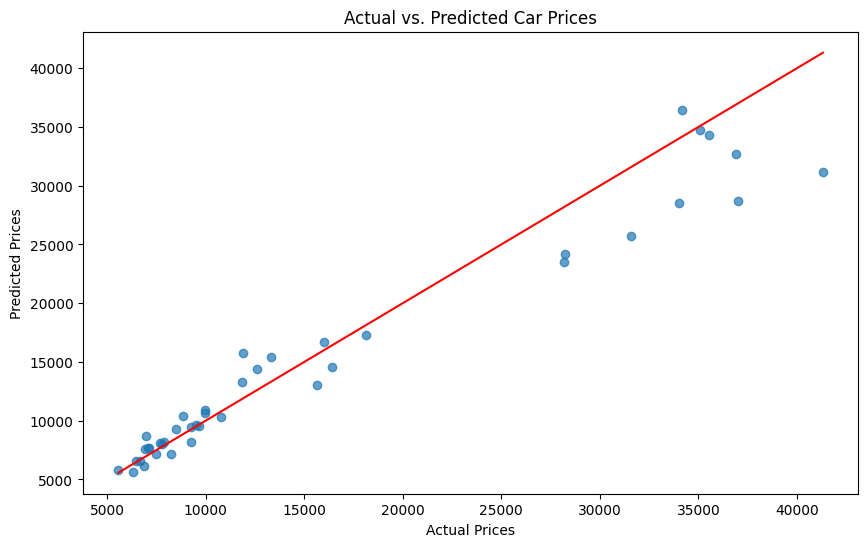

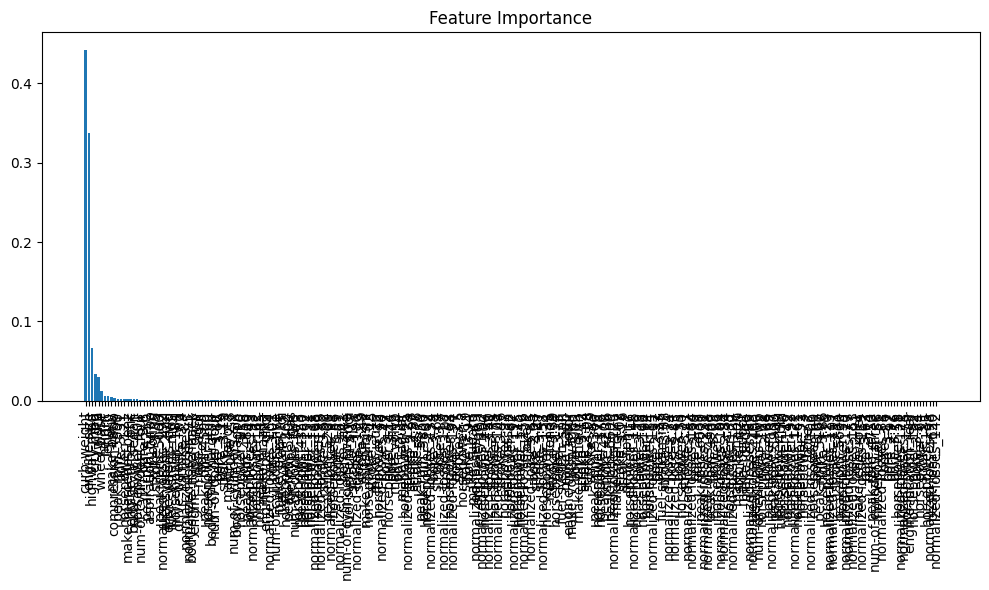

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Automobile_data.csv')

# Data Preprocessing
# Dropping rows with missing values in the 'price' column
data = data.dropna(subset=['price'])

# Convert price column to numeric (since it may contain '?')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Dropping rows where price is NaN after conversion
data = data.dropna(subset=['price'])

# Filling missing values in other columns (optional: forward fill)
data.fillna(method='ffill', inplace=True)

# Handling categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Exploratory Data Analysis (EDA)
# 1. Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap (check relationships between features)
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Scatter Plot for Price vs. Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine-size', y='price', data=data)
plt.title('Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

# Model Building
# Split Data
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-Squared: {r2}')

# Visualize Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.title('Actual vs. Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Feature Importance to interpret model
importances = model.feature_importances_
indices = importances.argsort()[::-1]

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
